# Modelling and Kinetics 2
## Part A: Procedure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-deep")

Br2_data=[0.15, 0.133, 0.122, 0.103, 0.099, 0.09, 0.083, 0.074, 0.066, 0.057,
            0.051, 0.051, 0.039, 0.033, 0.03, 0.017, 0.024, 0.01, 0.012, 0.015, 0.005]
BrCN_data=[0, 0.017, 0.026, 0.041, 0.041, 0.044, 0.045, 0.047, 0.048, 0.049,
             0.047, 0.039, 0.041, 0.038, 0.032, 0.035, 0.019, 0.022, 0.009, 0.005, 0.001]
CN2_data=[0, 0.002, 0.002, 0.003, 0.009, 0.015, 0.023, 0.029, 0.036, 0.042,
            0.051, 0.066, 0.069, 0.078, 0.09, 0.092, 0.114, 0.115, 0.132, 0.15, 0.155]
KCN_data=[0.3, 0.287, 0.27, 0.263, 0.241, 0.226, 0.21, 0.195, 0.181, 0.167,
            0.152, 0.13, 0.12, 0.106, 0.088, 0.08, 0.054, 0.047, 0.026, 0.004, 0.001]

In [2]:
def plot_data(K):
    plt.tight_layout()
    plt.plot(KCNcons_model, Br2_model, label='$Br(CH_2)_3Br$ Model')
    plt.plot(KCNcons_model, BrCN_model, label='$CN(CH_2)_3Br$ Model')
    plt.plot(KCNcons_model, CN2_model, label='$CN(CH_2)_3CN$ Model')
    plt.scatter(KCN_data, Br2_data, label='$Br(CH_2)_3Br$ Data')
    plt.scatter(KCN_data, BrCN_data, label='$CN(CH_2)_3Br$ Data')
    plt.scatter(KCN_data, CN2_data, label='$CN(CH_2)_3CN$ Data')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True)
    plt.xlabel('[KCN] / moldm$^{-3}$')
    plt.ylabel('Concentration / moldm$^{-3}$')
    # plt.title(f'Concentration of species, K = {K}')
    plt.show()

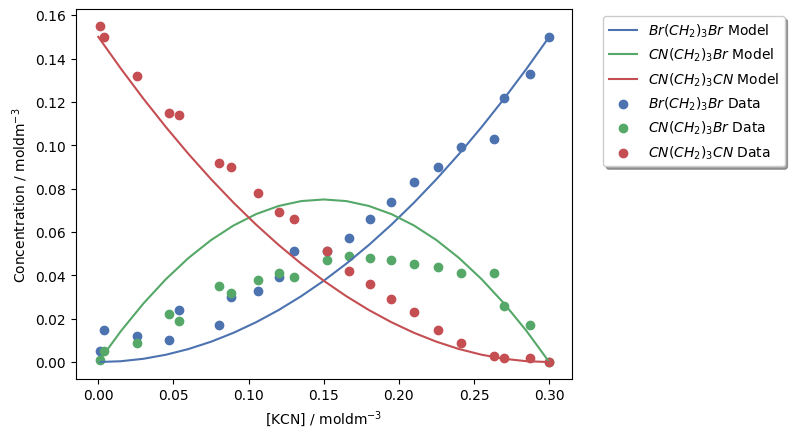

<Figure size 640x480 with 0 Axes>

In [6]:
K = 0.5
BrCN_model = []
Br2_model = []
KCNcons_model = np.linspace(0, 0.3, len(KCN_data))
KCN_model = [0.3-x for x in KCNcons_model] 
CN2_model = [((0.3-x)**2)/0.6 for x in KCNcons_model] 

for i in range(len(KCNcons_model)):
    BrCN_model.append(0.3-2*CN2_model[i]-KCNcons_model[i])
    Br2_model.append(0.15-CN2_model[i]-BrCN_model[i])

plot_data(K)
plt.savefig("PartA.png")

In [4]:
def model_B(K):
    KCN_model = [0.3]; Br2_model = [0.15]; BrCN_model = [0]; CN2_model = [0]
    for i in range(20):
        delta_Br2 = (delta_KCN*-1*Br2_model[i]) / (Br2_model[i] + K*BrCN_model[i])
        delta_CN2 = (delta_KCN*BrCN_model[i]) / ((Br2_model[i]/K) + BrCN_model[i])
        delta_BrCN = (-delta_Br2 - delta_CN2)

        KCN_model.append(KCN_model[i] - delta_KCN)
        Br2_model.append(Br2_model[i] + delta_Br2)
        BrCN_model.append(BrCN_model[i] + delta_BrCN)
        CN2_model.append(CN2_model[i] + delta_CN2)

    error = 0
    for z in range(20):
        Br2_err = (Br2_model[z] - Br2_data[z])**2
        BrCN_err = (BrCN_model[z] - BrCN_data[z])**2
        CN2_err = (CN2_model[z] - CN2_data[z])**2
        error = error + Br2_err + BrCN_err + CN2_err
    return error

K value with lowest error: 1.51
Error: 0.0007866694358539765


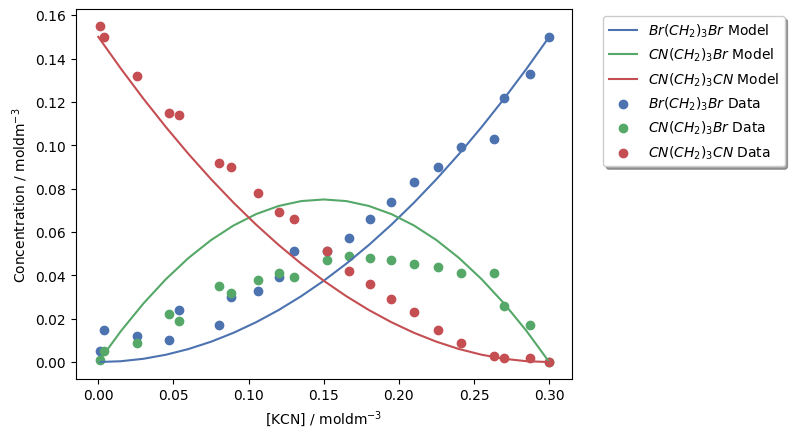

In [5]:
K_vals = np.round(np.arange(0.25, 2.5, 0.01),2)
error_vals = {}
delta_KCN = 0.015

for K in K_vals:
    error = model_B(K)
    error_vals[error] = K
    # plot_data(K)

print('K value with lowest error: ' + str(error_vals[min(error_vals)]))
print('Error: ' + str(min(error_vals)))

model_B(error_vals[min(error_vals)])
plot_data(error_vals[min(error_vals)])